In [1]:
# download and compile Pycall and Pandas to use python
import Pkg
Pkg.add("PyCall")
Pkg.add("Pandas")

Pkg.build("PyCall")
Pkg.build("Pandas")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/8c86e48c0db1564a1d49548d3515ced5d604c408/build.log`
    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/43d304ac6f0354755f1d60730ece8c499980f7ba/build.log`
    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/8c86e48c0db1564a1d49548d3515ced5d604c408/build.log`
    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/43d304ac6f0354755f1d60730ece8c499980f7ba/build.log`


In [5]:
# import julia libraries
using PyCall
using Pandas
using Random

# import python libraries
np = pyimport("numpy")

# if "invalid redefinition of constant chess" error pops out
# try to clear cache and restart the session
@pyimport chess
cp = pyimport("chess.pgn")



PyObject <module 'chess.pgn' from '/home/ubuntu/.local/lib/python3.10/site-packages/chess/pgn.py'>

### Imports

In [3]:
using Random
using PyCall
@pyimport chess
cp = pyimport("chess.pgn")


PyObject <module 'chess.pgn' from '/home/ubuntu/.local/lib/python3.10/site-packages/chess/pgn.py'>

# Explaining the Chess Game Analysis Pipeline

The Chess Game Analysis Pipeline is designed to process and analyze chess games from a PGN (Portable Game Notation) file. This pipeline is particularly tailored for filtering and categorizing games based on specific criteria such as time control and player ELO ratings. Below is an overview of its components and functionalities.

## Overview

The pipeline is structured around a `Pipeline` struct in Julia, which is used to manage the processing of chess games. It includes various functions for counting games, reading specific games, generating random game indices, and more.

## Global Variables

- `filename`: The path to the PGN file containing the chess games.
- `seed`: A seed value for controlling randomness in the pipeline, ensuring reproducible results.

## The `Pipeline` Struct

The `Pipeline` struct is the core of the pipeline, containing fields and methods necessary for processing the chess games.

### Fields

- `filename`: Path to the PGN file.
- `seed`: Seed for random number generation, ensuring consistency.
- `games_per_cell`: The target number of games for each category in the analysis matrix.
- `matrix`: A 3x3 matrix, each cell containing an array of integers representing game indices.
- `total_games`: Total number of games in the file.

### Methods

- `count_games_in_file`: Counts the total number of games in the PGN file.
- `read_nth_game`: Reads the nth game from the file.
- `randoming`: Generates a random number within the range of total games in the file.
- `write_file`: Writes game data to a file, either creating a new file or appending to an existing one.
- `check_criteria`: Checks whether a game meets the specified criteria based on time controls and player ELO ranges.

## Processing Procedure

1. **Initialization**: A `Pipeline` instance is created with the specified filename and seed.
2. **Counting Games**: The total number of games in the file is counted.
3. **Game Selection**: Games are randomly selected and checked against specified criteria.
4. **Criteria Checking**: Each game is evaluated to determine if it fits the desired time control and ELO range categories.
5. **Data Storage**: Valid games are stored in the matrix, categorized based on the analysis goals.


In [1]:
struct Pipeline
    filename::String
    seed::Int
    games_per_cell::Int
    matrix::Array{Array{Int,1},2}
    total_games::Int

    Pipeline(filename::String, seed::Int, games_per_cell::Int) = new(filename, seed, games_per_cell, fill([], 3, 3), 0)
end

function count_games_in_file(pipeline::Pipeline)
    Random.seed!(pipeline.seed)  # Seed the random number generator
    pgn = open(pipeline.filename)
    count = 0
    while true
        game = cp.read_game(pgn)
        if game === nothing
            break
        end
        count += 1
    end
    close(pgn)
    pipeline.total_games = count
    return count
end

function read_nth_game(pipeline::Pipeline, n::Int)
    pgn = open(pipeline.filename)
    game = nothing
    for i in 1:n
        game = cp.read_game(pgn)
        if game === nothing
            break
        end
    end
    close(pgn)
    return game
end

function randoming(pipeline::Pipeline, n::Int)
    Random.seed!(pipeline.seed)  # Re-seed to ensure reproducibility
    return rand(1:pipeline.total_games, n)
end

function write_file(filename::String, game_data::String)
    if isfile(filename)
        open(filename, "a") do file
            write(file, game_data)
        end
    else
        write(filename, game_data)
    end
end


function check_criteria(game)
    # Define the criteria for time controls and ELO ranges
    valid_time_controls = Dict("Blitz" => 180, "Rapid" => 600, "Classical" => 1800)
    elo_ranges = Dict("Beginner" => (1250, 1350), "Intermediate" => (1750, 1850), "Expert" => (2150, Inf))

    # Extract the necessary information from the game object
    # This includes time control and player ELOs
    # Adjust these lines based on your game object's structure
    time_control = get_time_control(game) # Placeholder function
    player1_elo = get_player_elo(game, 1) # Placeholder function
    player2_elo = get_player_elo(game, 2) # Placeholder function

    # Check if the time control of the game matches any of the valid time controls
    time_control_valid = any([(time_control == tc) for tc in values(valid_time_controls)])

    # Check if both players' ELOs fall within the same valid ELO range
    elo_valid = any([(elo1, elo2) in [(r1, r2), (r2, r1)] for (r1, r2) in values(elo_ranges) if r1 <= player1_elo <= r2 && r1 <= player2_elo <= r2])

    # Return true if both time control and ELO criteria are met
    return time_control_valid && elo_valid
end


check_criteria (generic function with 1 method)

### Global variable

In [4]:
# file name of the original decompressed file
filename = "./data/lichess_db_standard_rated_2023-09.pgn"

# the seed for the randomness control in this project
seed = 2023


2023

In [ ]:
# Create a Pipeline instance
pipeline = Pipeline(filename, seed, 300)

# Count the total number of games in the file
total_games = count_games_in_file(pipeline)
println("Total games in the file: ", total_games)

# Read the nth game (for example, the 10th game)
nth_game = read_nth_game(pipeline, 10)
println("The 10th game: ", nth_game)

# Generate a random number within the range of total games
# Let's generate the 5th random number as an example
random_game_index = randoming(pipeline, 5)
println("Random game index: ", random_game_index)

# Check if the nth game meets the criteria
# Assuming nth_game is a valid game object and check_criteria is implemented correctly
is_valid_game = check_criteria(nth_game)
println("Does the 10th game meet the criteria? ", is_valid_game)


# Archived

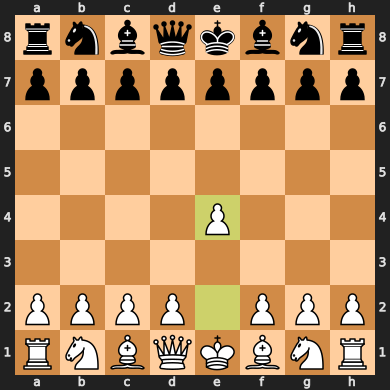

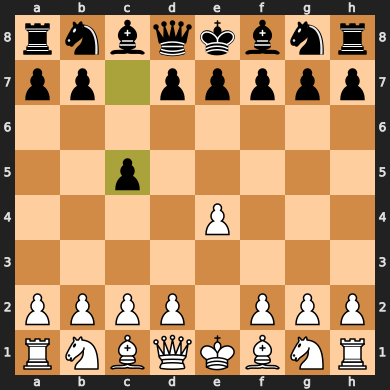

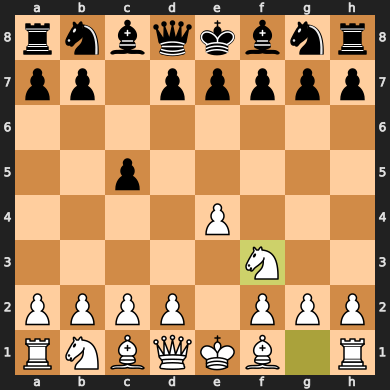

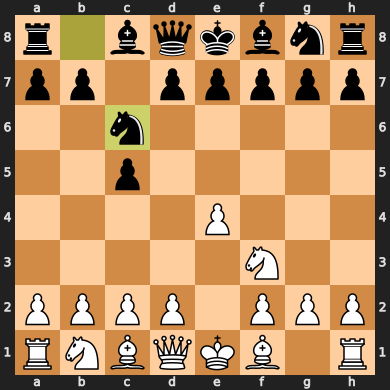

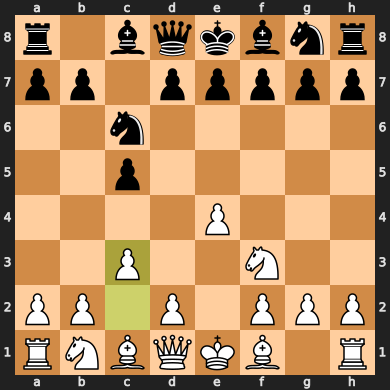

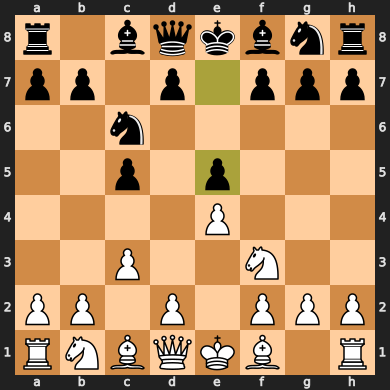

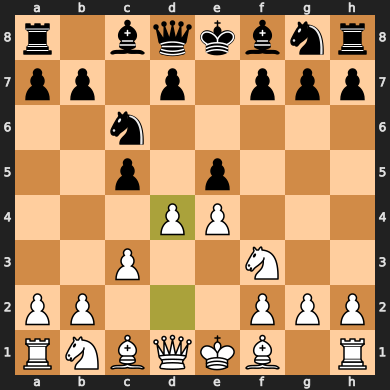

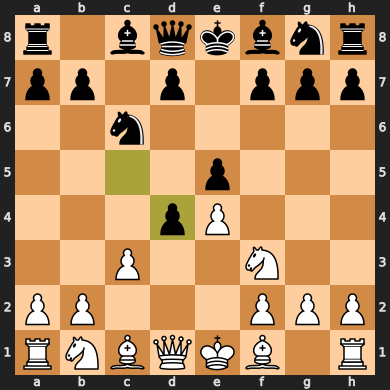

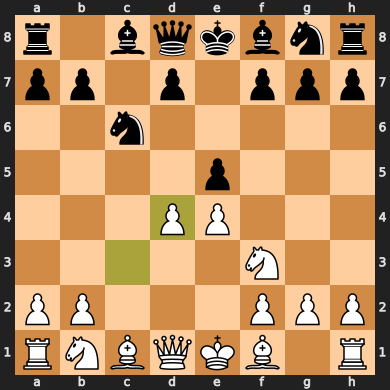

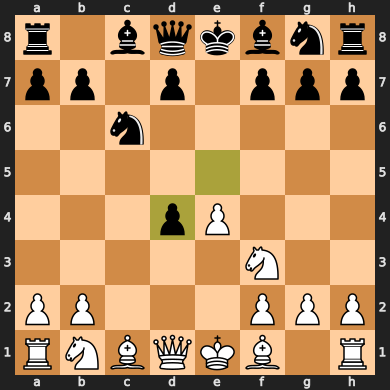

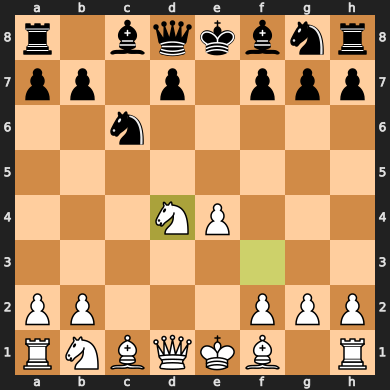

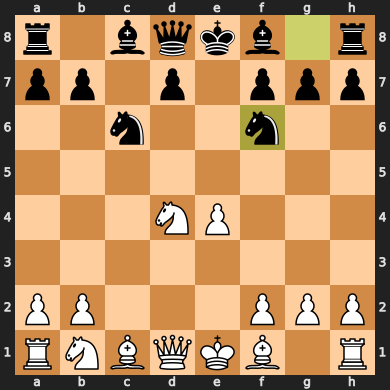

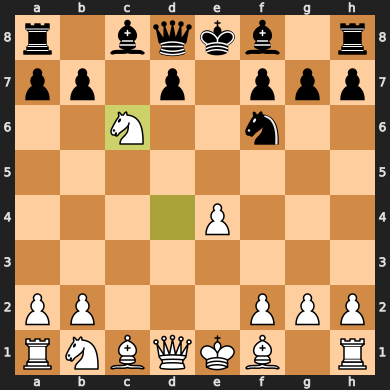

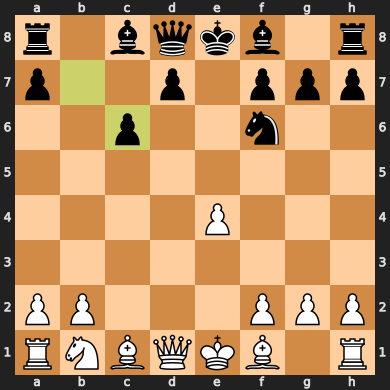

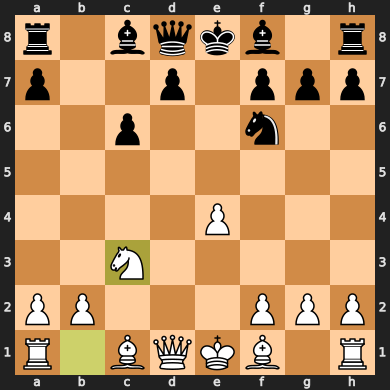

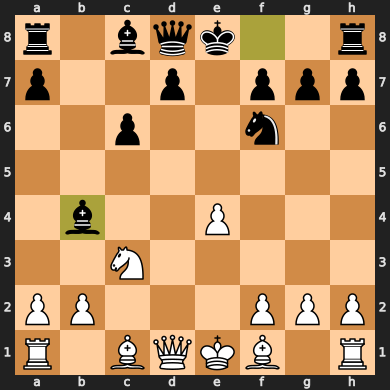

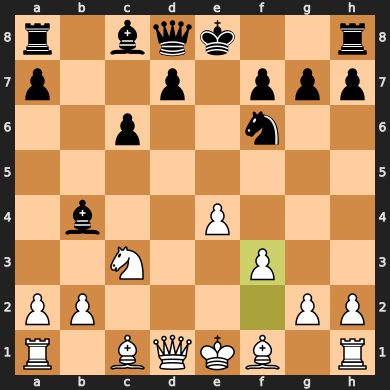

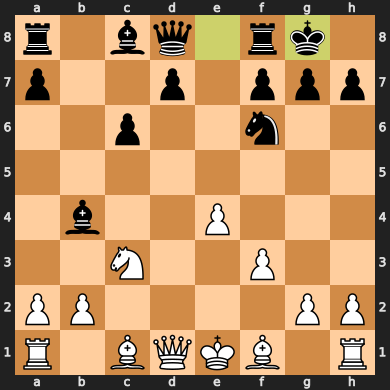

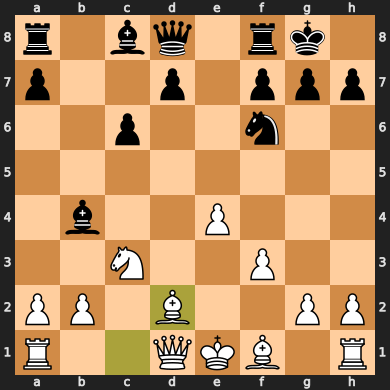

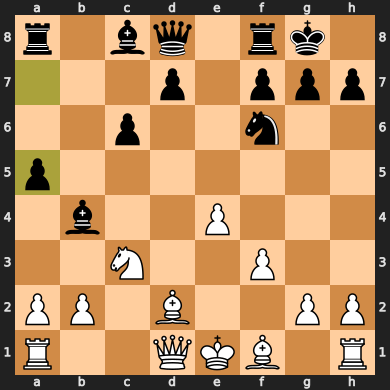

In [ ]:
# test of reading file
pgn = open(filename)  # Ensure this is opened in text mode
first_game = cp.read_game(pgn)
first_game.headers
board = first_game.board()
for move in first_game.mainline_moves()
    board.push(move)
    display(board)
    sleep(2)
end


In [56]:
using Random
using PyCall
@pyimport chess
cp = pyimport("chess.pgn")

# Define the `Pipeline` structure which encapsulates the functionality
# for processing PGN (Portable Game Notation) files with reproducible randomness.
struct Pipeline
    filename::String  # The filename for the PGN file where chess games are stored.
    seed::Int         # The seed for random number generation to ensure reproducibility.
    random_number::Int  # An example random number generated using the seed for demonstration.
    game_count::Int  # The total number of games in the PGN file, calculated once upon instantiation.

    # Constructor for the `Pipeline` object. It initializes the object with the given filename and seed.
    # A random number is generated as an example of using the seed.
    function Pipeline(filename::String, seed::Int)
        Random.seed!(seed)  # Set the random seed for reproducible random number generation.
        game_count = count_games_in_file()

 
    end

    # Function to count the number of games in a PGN file.
    # It iterates over all games in the file and counts them.
    function count_games_in_file(self::Pipeline)::Int
        pgn = open(self.filename)  # Open the PGN file.
        count = 0  # Initialize the count of games to zero.
        while true
            game = cp.read_game(pgn)
            if game === nothing
                break  # If no more games are found, exit the loop.
            end
            count += 1  # Increment the game count.
        end
        close(pgn)  # Close the PGN file after processing.
        return count  # Return the total count of games.
    end
        
    # Function to read the nth game from a PGN file.
    # It skips through the games in the file until it reaches the nth game.
    function read_nth_game(self::Pipeline, n::Int):
        pgn = open(self.filename)  # Open the PGN file in text mode.
        game = nothing  # Initialize `game` to `nothing`.
        for i in 1:n
            game = chess.pgn.read_game(pgn)
            if game === nothing
                break  # If the game is not found (end of file), exit the loop.
            end
        end
        close(pgn)  # Close the PGN file after processing.
        return game  # Return the nth game if found, else return `nothing`.
    end

    # Function `randoming` generates the nth random integer number given a seed and a range.
    # It is intended to be used for selecting a game randomly from a PGN file.
    function randoming(self::Pipeline, n::Int, upper_bound::Int)::Int
        rand_num = 0  # Initialize the variable to store the nth random number.
        for i in 1:n
            rand_num = rand(1:upper_bound)  # Generate the next random integer within the range.
        end
        return rand_num  # Return the nth random integer.
    end
    
end

LoadError: syntax: newline not allowed after ":" used for quoting

randoming (generic function with 3 methods)

In [ ]:
using PyCall

# Global variables
filename = "./data/lichess_db_standard_rated_2023-09.pgn"
filtered_filename = "./data/filtered_3000_games.pgn"

# Function to check if a game meets the criteria
function check_criteria(game)
    # ... (implement your criteria checking logic here) ...
end

# Open the original PGN file
pgn = open(filename)

# Open a new PGN file to save the filtered games
filtered_pgn = open(filtered_filename, "w")

# Iterate through the games, checking criteria and saving to the new file
count = 0
while count < 3000
    game = cp.read_game(pgn)
    if game === nothing
        break  # Exit the loop if there are no more games
    end
    
    # if check_criteria(game)
        write(filtered_pgn, string(game))
        count += 1
    # end
end

# Close both PGN files
close(pgn)
close(filtered_pgn)
